In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '4'

from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

2024-01-15 20:25:16.733385: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 20:25:16.733431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 20:25:16.735008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 20:25:18.185389: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05

funnel_config = set_task(funnel_config, "funnel")
funnel_config.model.reference_process_key = "oudstl"

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [3]:
funnel_config.model.reference_process_key 

'oudstl'

In [4]:
funnel_config.model.input_dim

10

In [5]:
funnel_config.model.step_scheme_key

'cos_sq'

In [6]:
funnel_config.model.ts.shape

(128,)

In [7]:
# funnel_config.trainer.epochs = 2000
out_dict = train_dds(funnel_config)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: angusphillips (oxcsml). Use `wandb login --relogin` to force relogin


('epoch: %s %s  loss: %s', 0, 'TRAIN', 3.2578799724578857)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 2.377671957015991)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 2.273287296295166)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 2.1829891204833984)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 2.116422653198242)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 1.9568700790405273)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 1.8952263593673706)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 1.9856938123703003)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 1.863215684890747)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 1.8692353963851929)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 1.7949392795562744)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 1.65470290184021)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 1.7187498807907104)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 1.6549556255340576)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 1.6366877555847168)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 1.6668882369995117)
('epoch: %s %s  loss: %s', 16, 'TRAIN', 1.57485187053680

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


elbo_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
elbo_results/loss,▃▂▂█▂▂▂▂▁▂▂▂▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▂▁
elbo_results_eval/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
elbo_results_eval/loss,▅▃▄▁▅▄▅▂▅▅▄▆▂▄▄▂▆▆▃▂▄▆▆▃▃▄▄▆▄█
is_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
is_results/loss,█▆▇█▄▇▁▆▆▆▆▆▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
is_results_eval/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
is_results_eval/loss,▅▄▆▇▇▇▇▆▆█▆▂▁▂▇▇▇▇▆▆▆▇█▆█▆▆▆▇▆
lr/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr/lr,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
pf_results/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [8]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [26]:
out_dict[-1]["aug_ode_ext"].shape

(2500, 129, 12)

In [9]:
out_dict[-1]["is_eval"]

[0.12042808532714844,
 0.07354164123535156,
 0.20493078231811523,
 0.2645449638366699,
 0.2415304183959961,
 0.24301528930664062,
 0.22800445556640625,
 0.19603824615478516,
 0.1714186668395996,
 0.27533626556396484,
 0.21359014511108398,
 -0.005012035369873047,
 -0.08534717559814453,
 -0.039908409118652344,
 0.21944189071655273,
 0.2588310241699219,
 0.23798799514770508,
 0.22365522384643555,
 0.17520952224731445,
 0.16355133056640625,
 0.20741701126098633,
 0.23820829391479492,
 0.2880229949951172,
 0.19650983810424805,
 0.3002157211303711,
 0.19404888153076172,
 0.20126914978027344,
 0.18703746795654297,
 0.23433589935302734,
 0.19985437393188477]

In [10]:
onp.mean(out_dict[-1]["is_eval"])

0.18759026527404785

In [11]:
onp.mean(out_dict[-1]["pf_eval"])

-29.211977386474608

In [12]:
out_dict[-1]["pf_eval"]

[-26.33954620361328,
 -32.957313537597656,
 -32.6491584777832,
 -29.70153045654297,
 -33.41920852661133,
 -29.27861785888672,
 -26.981441497802734,
 -27.308685302734375,
 -23.480466842651367,
 -28.369693756103516,
 -33.7991943359375,
 -26.460662841796875,
 -28.581764221191406,
 -22.507766723632812,
 -31.41437530517578,
 -23.819000244140625,
 -27.795154571533203,
 -31.831134796142578,
 -31.192302703857422,
 -27.839885711669922,
 -22.784494400024414,
 -25.701934814453125,
 -33.281982421875,
 -32.59535217285156,
 -25.188720703125,
 -38.177711486816406,
 -24.693809509277344,
 -32.27830123901367,
 -29.141525268554688,
 -36.7885856628418]

In [13]:
funnel_config.model.reference_process_key

'oudstl'

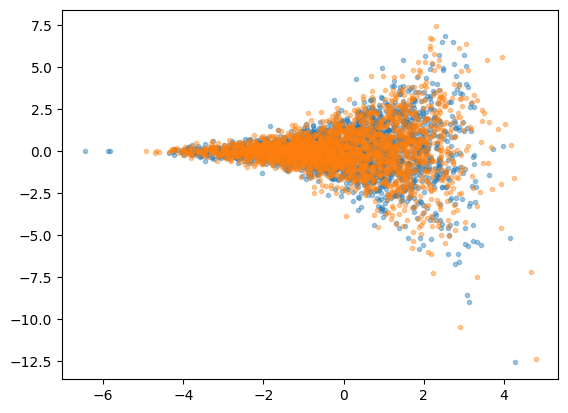

In [14]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

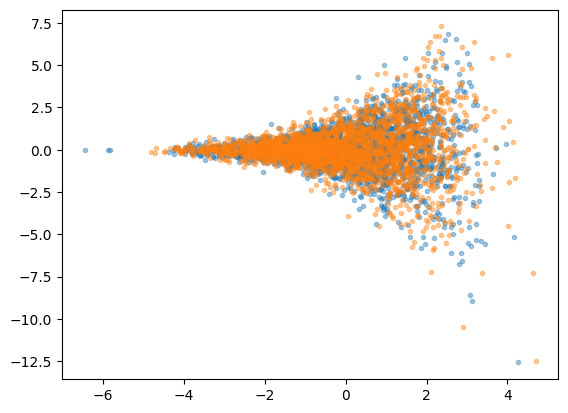

In [17]:
import matplotlib.pyplot as plt

timestep = 100

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

In [18]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [19]:
cake

Array(-34.70441, dtype=float32)

In [20]:
funnel_config.model.target(out_dict[-1]["aug_ode"][:, -1,:10]).mean()

Array(-13.984681, dtype=float32)

In [21]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

Array(-14.966006, dtype=float32)

In [22]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(10) , funnel_config.model.sigma * np.ones(10))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

Array(-14.966006, dtype=float32)

In [21]:
funnel_config

{'dataset': {}, 'eval': {'seeds': 30}, 'model': {'activation': <function gelu at 0x7f74cfb72830>, 'activation_dict': {'gelu': <function gelu at 0x7f74cfb72830>, 'relu': <jax._src.custom_derivatives.custom_jvp object at 0x7f752e740df0>, 'swish': <CompiledFunction of <function silu at 0x7f752e54c3a0>>}, 'activation_key': 'gelu', 'alpha': 0.6875, 'batch_size': 300, 'detach_path': False, 'detach_stl_drift': False, 'dt': 0.05, 'elbo_batch_size': 2000, 'exp_dds': False, 'fully_connected_units': [64, 64], 'input_dim': 10, 'learn_betas': False, 'log': False, 'm': 1.0, 'network_dict': {'pis': <class 'dds.drift_nets.PISGRADNet'>, 'pisudp': <class 'dds.drift_nets_udp.UDPPISGRADNet'>, 'vanilla': <class 'dds.drift_nets.SimpleDriftNet'>, 'vanilla_udp': <class 'dds.drift_nets_udp.UDPSimpleDriftNet'>}, 'network_key': 'pis', 'reference_process_dict': {'oudstl': <class 'dds.stl_samplers.AugmentedOUDFollmerSDESTL'>, 'oududp': <class 'dds.udp_samplers.AugmentedOUDFollmerSDEUDP'>, 'oustl': <class 'dds.stl_